## Programming assignment #3

## Course: CHE1147H - Data Mining in Engineering

### 1 Feature engineering

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn import preprocessing as prep
from itertools import product
import matplotlib.pyplot as plt

### 1.1 Import the data and create the anchor date columns

**1. Import the dataset as txn and identify the number of rows.**

In [2]:
txn = pd.read_csv("Retail_Data_Transactions.csv")
txn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


There are 125,000 rows in the data set

**2. The date-format in column 'trans date' is not standard. Create a new column 'txn date'
from 'trans date' with pd.to datetime and drop the column 'trans date'.**

In [3]:
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
txn

,customer_id,trans_date,tran_amount,txn_date
0,CS5295,11-Feb-13,35,2013-02-11
1,CS4768,15-Mar-15,39,2015-03-15
2,CS2122,26-Feb-13,52,2013-02-26
3,CS1217,16-Nov-11,99,2011-11-16
4,CS1850,20-Nov-13,78,2013-11-20
...,...,...,...,...
124995,CS8433,26-Jun-11,64,2011-06-26
124996,CS7232,19-Aug-14,38,2014-08-19
124997,CS8731,28-Nov-14,42,2014-11-28
124998,CS8133,14-Dec-13,13,2013-12-14


In [4]:
txn.drop(['trans_date'], axis=1, inplace=True)
txn

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


**3. Identify the min() and max() of column 'txn date'.**

In [5]:
txn['txn_date'].min()

Timestamp('2011-05-16 00:00:00')

In [6]:
txn['txn_date'].max()

Timestamp('2015-03-16 00:00:00')

**4. Create the column 'ME DT': the last day of the month in the 'trans date' column.
DateOffset objects is a simple way to do this in pandas.**

In [7]:
txn['ME_DT'] = 0

In [8]:
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,0
1,CS4768,39,2015-03-15,0
2,CS2122,52,2013-02-26,0
3,CS1217,99,2011-11-16,0
4,CS1850,78,2013-11-20,0


In [9]:
txn['ME_DT'] = txn['txn_date'].apply(lambda x: pd.Timestamp(x) + pd.offsets.MonthEnd(n=0))

In [10]:
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


**5. Create the column 'YEAR': the year in the 'trans date' column. DatetimeIndex with
attribute .year will help you do so.**

In [11]:
txn['Year'] = pd.DatetimeIndex(txn['txn_date']).year
txn

,customer_id,tran_amount,txn_date,ME_DT,Year
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


### 1.2 Create features that capture annual spending

**1. Using groupby and NamedAgg create clnt annual aggregations, the annual aggre-
gations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation
functions.**

In [12]:
clnt_annual_aggregations = txn.groupby(['customer_id','Year']).agg({'tran_amount': ['sum','mean','std','var','sem','max','min','count']})
clnt_annual_aggregations

tran_amount                                                \
                         sum       mean        std          var        sem   
customer_id Year                                                             
CS1112      2011         212  70.666667  22.030282   485.333333  12.719189   
            2012         337  67.400000  12.720063   161.800000   5.688585   
            2013         212  70.666667  34.501208  1190.333333  19.919282   
            2014         212  70.666667  16.862186   284.333333   9.735388   
            2015          39  39.000000        NaN          NaN        NaN   
...                      ...        ...        ...          ...        ...   
CS9000      2011          39  19.500000   4.949747    24.500000   3.500000   
            2012         216  54.000000  16.772994   281.333333   8.386497   
            2013         147  73.500000   3.535534    12.500000   2.500000   
            2014          97  24.250000   8.261356    68.250000   4.130678   
            2015          34  34.000000        NaN          NaN        NaN   

                                 
                  max min count  
customer_id Year                 
CS1112      2011   96  56     3  
            2012   81  52     5  
            2013  105  36     3  
            2014   90  59     3  
            2015   39  39     1  
...               ...  ..   ...  
CS9000      2011   23  16     2  
            2012   77  37     4  
            2013   76  71     2  
            2014   35  16     4  
            2015   34  34     1  

[31140 rows x 8 columns]

In [13]:
clnt_annual_aggregations.columns = ['ann_txn_amt_sum','ann_txn_amt_mean','ann_txn_amt_std','ann_txn_amt_var','ann_txn_amt_sem','ann_txn_amt_max','ann_txn_amt_min','ann_txn_cnt']
clnt_annual_aggregations_1 = DataFrame(clnt_annual_aggregations)
clnt_annual_aggregations_1

ann_txn_amt_sum  ann_txn_amt_mean  ann_txn_amt_std  \
customer_id Year                                                       
CS1112      2011              212         70.666667        22.030282   
            2012              337         67.400000        12.720063   
            2013              212         70.666667        34.501208   
            2014              212         70.666667        16.862186   
            2015               39         39.000000              NaN   
...                           ...               ...              ...   
CS9000      2011               39         19.500000         4.949747   
            2012              216         54.000000        16.772994   
            2013              147         73.500000         3.535534   
            2014               97         24.250000         8.261356   
            2015               34         34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id Year                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id Year                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1  
...                           ...          ...  
CS9000      2011               16            2  
            2012               37            4  
            2013               71            2  
            2014               16            4  
            2015               34            1  

[31140 rows x 8 columns]

**2. Plot the histogram of the sum and count.**

<AxesSubplot:>

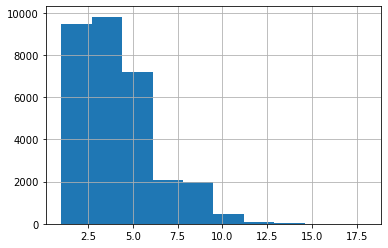

In [14]:
clnt_annual_aggregations['ann_txn_cnt'].hist()

<AxesSubplot:>

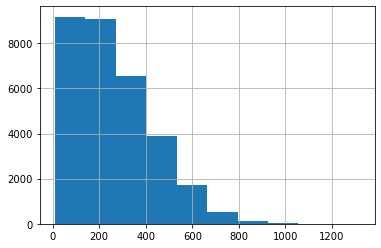

In [15]:
clnt_annual_aggregations['ann_txn_amt_sum'].hist()

**3. Reset the index and reshape the table with the pivot table function to create the
clnt annual aggregations pivot table shown below with 40 columns (why 40?).
You should expect columns with NaN values. Impute the NaN entries when you
perform the pivot table function and explain your choice of values.**

In [16]:
clnt_annual_aggregations_pivot = pd.pivot_table(clnt_annual_aggregations_1,values=['ann_txn_amt_sum','ann_txn_amt_mean','ann_txn_amt_std','ann_txn_amt_var','ann_txn_amt_sem','ann_txn_amt_max','ann_txn_amt_min','ann_txn_cnt'],index=['customer_id'],columns=['Year'])
clnt_annual_aggregations_pivot

ann_txn_amt_max                           ann_txn_amt_mean  \
Year                   2011   2012   2013  2014  2015             2011   
customer_id                                                              
CS1112                 96.0   81.0  105.0  90.0  39.0        70.666667   
CS1113                 94.0   95.0   97.0  97.0  98.0        81.333333   
CS1114                 97.0   97.0  105.0  95.0  79.0        85.200000   
CS1115                102.0  104.0   94.0  98.0  55.0        87.000000   
CS1116                 87.0  105.0   59.0  96.0   NaN        58.750000   
...                     ...    ...    ...   ...   ...              ...   
CS8996                 38.0   38.0   50.0  79.0   NaN        31.000000   
CS8997                 47.0   49.0   75.0  45.0   NaN        45.000000   
CS8998                 69.0   79.0   75.0  49.0   NaN        64.000000   
CS8999                 64.0   30.0   39.0  24.0   NaN        52.000000   
CS9000                 23.0   77.0   76.0  35.0  34.0        19.500000   

                                                         ... ann_txn_amt_var  \
Year              2012       2013       2014       2015  ...            2011   
customer_id                                              ...                   
CS1112       67.400000  70.666667  70.666667  39.000000  ...      485.333333   
CS1113       74.800000  85.200000  56.500000  73.333333  ...      444.333333   
CS1114       75.000000  70.400000  70.833333  79.000000  ...       94.700000   
CS1115       67.571429  79.571429  78.250000  55.000000  ...      225.000000   
CS1116       76.666667  59.000000  66.600000        NaN  ...      449.583333   
...                ...        ...        ...        ...  ...             ...   
CS8996       33.666667  41.500000  56.000000        NaN  ...       98.000000   
CS8997       39.500000  35.166667  42.000000        NaN  ...        8.000000   
CS8998       54.400000  47.000000  32.500000        NaN  ...       50.000000   
CS8999       25.250000  28.000000  21.000000        NaN  ...      333.000000   
CS9000       54.000000  73.500000  24.250000  34.000000  ...       24.500000   

                                                             ann_txn_cnt       \
Year               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333         NaN         3.0  5.0   
CS1113       290.200000   171.200000  781.666667  745.333333         3.0  5.0   
CS1114       968.000000   619.300000  726.166667         NaN         5.0  2.0   
CS1115       477.285714   110.952381  512.250000         NaN         3.0  7.0   
CS1116       908.333333          NaN  636.800000         NaN         4.0  3.0   
...                 ...          ...         ...         ...         ...  ...   
CS8996        20.333333   144.500000  481.600000         NaN         2.0  3.0   
CS8997        45.666667   441.366667   18.000000         NaN         2.0  4.0   
CS8998       505.300000  1568.000000  219.666667         NaN         2.0  5.0   
CS8999        21.583333   103.000000   18.000000         NaN         3.0  4.0   
CS9000       281.333333    12.500000   68.250000         NaN         2.0  4.0   

                            
Year        2013 2014 2015  
customer_id                 
CS1112       3.0  3.0  1.0  
CS1113       5.0  4.0  3.0  
CS1114       5.0  6.0  1.0  
CS1115       7.0  4.0  1.0  
CS1116       1.0  5.0  NaN  
...          ...  ...  ...  
CS8996       2.0  6.0  NaN  
CS8997       6.0  2.0  NaN  
CS8998       2.0  4.0  NaN  
CS8999       3.0  2.0  NaN  
CS9000       2.0  4.0  1.0  

[6889 rows x 40 columns]

In [17]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.apply(lambda x: x.fillna(0),axis=0)
clnt_annual_aggregations_pivot

ann_txn_amt_max                           ann_txn_amt_mean  \
Year                   2011   2012   2013  2014  2015             2011   
customer_id                                                              
CS1112                 96.0   81.0  105.0  90.0  39.0        70.666667   
CS1113                 94.0   95.0   97.0  97.0  98.0        81.333333   
CS1114                 97.0   97.0  105.0  95.0  79.0        85.200000   
CS1115                102.0  104.0   94.0  98.0  55.0        87.000000   
CS1116                 87.0  105.0   59.0  96.0   0.0        58.750000   
...                     ...    ...    ...   ...   ...              ...   
CS8996                 38.0   38.0   50.0  79.0   0.0        31.000000   
CS8997                 47.0   49.0   75.0  45.0   0.0        45.000000   
CS8998                 69.0   79.0   75.0  49.0   0.0        64.000000   
CS8999                 64.0   30.0   39.0  24.0   0.0        52.000000   
CS9000                 23.0   77.0   76.0  35.0  34.0        19.500000   

                                                         ... ann_txn_amt_var  \
Year              2012       2013       2014       2015  ...            2011   
customer_id                                              ...                   
CS1112       67.400000  70.666667  70.666667  39.000000  ...      485.333333   
CS1113       74.800000  85.200000  56.500000  73.333333  ...      444.333333   
CS1114       75.000000  70.400000  70.833333  79.000000  ...       94.700000   
CS1115       67.571429  79.571429  78.250000  55.000000  ...      225.000000   
CS1116       76.666667  59.000000  66.600000   0.000000  ...      449.583333   
...                ...        ...        ...        ...  ...             ...   
CS8996       33.666667  41.500000  56.000000   0.000000  ...       98.000000   
CS8997       39.500000  35.166667  42.000000   0.000000  ...        8.000000   
CS8998       54.400000  47.000000  32.500000   0.000000  ...       50.000000   
CS8999       25.250000  28.000000  21.000000   0.000000  ...      333.000000   
CS9000       54.000000  73.500000  24.250000  34.000000  ...       24.500000   

                                                             ann_txn_cnt       \
Year               2012         2013        2014        2015        2011 2012   
customer_id                                                                     
CS1112       161.800000  1190.333333  284.333333    0.000000         3.0  5.0   
CS1113       290.200000   171.200000  781.666667  745.333333         3.0  5.0   
CS1114       968.000000   619.300000  726.166667    0.000000         5.0  2.0   
CS1115       477.285714   110.952381  512.250000    0.000000         3.0  7.0   
CS1116       908.333333     0.000000  636.800000    0.000000         4.0  3.0   
...                 ...          ...         ...         ...         ...  ...   
CS8996        20.333333   144.500000  481.600000    0.000000         2.0  3.0   
CS8997        45.666667   441.366667   18.000000    0.000000         2.0  4.0   
CS8998       505.300000  1568.000000  219.666667    0.000000         2.0  5.0   
CS8999        21.583333   103.000000   18.000000    0.000000         3.0  4.0   
CS9000       281.333333    12.500000   68.250000    0.000000         2.0  4.0   

                            
Year        2013 2014 2015  
customer_id                 
CS1112       3.0  3.0  1.0  
CS1113       5.0  4.0  3.0  
CS1114       5.0  6.0  1.0  
CS1115       7.0  4.0  1.0  
CS1116       1.0  5.0  0.0  
...          ...  ...  ...  
CS8996       2.0  6.0  0.0  
CS8997       6.0  2.0  0.0  
CS8998       2.0  4.0  0.0  
CS8999       3.0  2.0  0.0  
CS9000       2.0  4.0  1.0  

[6889 rows x 40 columns]

There are **8** aggregation functions such as sum, mean, std, var, sem, max, min, and count. We are also analysing for **5** different time periods 2011,2012,2013,2014,2015. After pivoting, every aggregation function has an analysis for 5 years. Therefore there are **8*5=40** columns. Also if a customer did not purchase any product during a month, then the value of aggregation functions should be zero.

**4. The pivoted object you created is a MultiIndex object with hierarchical indexes. You
can see the first level (i.e. 0) in the snapshot above with names 'ann txn amt ave',
'ann txn amt max' (and more as indicated by the ...) and the second level (i.e. 1)
with names '2011', '2012', etc. You can confirm the multiple levels of the columns with
the following two expressions.
What are your observations regarding the number of levels and the column names?**

In [18]:
clnt_annual_aggregations_pivot.columns

MultiIndex([( 'ann_txn_amt_max', 2011),
            ( 'ann_txn_amt_max', 2012),
            ( 'ann_txn_amt_max', 2013),
            ( 'ann_txn_amt_max', 2014),
            ( 'ann_txn_amt_max', 2015),
            ('ann_txn_amt_mean', 2011),
            ('ann_txn_amt_mean', 2012),
            ('ann_txn_amt_mean', 2013),
            ('ann_txn_amt_mean', 2014),
            ('ann_txn_amt_mean', 2015),
            ( 'ann_txn_amt_min', 2011),
            ( 'ann_txn_amt_min', 2012),
            ( 'ann_txn_amt_min', 2013),
            ( 'ann_txn_amt_min', 2014),
            ( 'ann_txn_amt_min', 2015),
            ( 'ann_txn_amt_sem', 2011),
            ( 'ann_txn_amt_sem', 2012),
            ( 'ann_txn_amt_sem', 2013),
            ( 'ann_txn_amt_sem', 2014),
            ( 'ann_txn_amt_sem', 2015),
            ( 'ann_txn_amt_std', 2011),
            ( 'ann_txn_amt_std', 2012),
            ( 'ann_txn_amt_std', 2013),
            ( 'ann_txn_amt_std', 2014),
            ( 'ann_txn_amt_std', 2015),


In [19]:
clnt_annual_aggregations_pivot.columns.nlevels

2

There are 2 levels after pivoting the table

**5. Finally, you want to save the dataframe clnt annual aggregations pivot as an
.xlsx file for future use in the machine learning assignment. To do so, you want
to remove the two levels in columns and create a single level with column names:
'ann txn amt ave 2011', 'ann txn amt ave 2012', etc. Describe what each line of code in the box does and save the output dataframe as
an Excel file annual_features.xlsx.**

In [20]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_0

Index(['ann_txn_amt_max', 'ann_txn_amt_max', 'ann_txn_amt_max',
       'ann_txn_amt_max', 'ann_txn_amt_max', 'ann_txn_amt_mean',
       'ann_txn_amt_mean', 'ann_txn_amt_mean', 'ann_txn_amt_mean',
       'ann_txn_amt_mean', 'ann_txn_amt_min', 'ann_txn_amt_min',
       'ann_txn_amt_min', 'ann_txn_amt_min', 'ann_txn_amt_min',
       'ann_txn_amt_sem', 'ann_txn_amt_sem', 'ann_txn_amt_sem',
       'ann_txn_amt_sem', 'ann_txn_amt_sem', 'ann_txn_amt_std',
       'ann_txn_amt_std', 'ann_txn_amt_std', 'ann_txn_amt_std',
       'ann_txn_amt_std', 'ann_txn_amt_sum', 'ann_txn_amt_sum',
       'ann_txn_amt_sum', 'ann_txn_amt_sum', 'ann_txn_amt_sum',
       'ann_txn_amt_var', 'ann_txn_amt_var', 'ann_txn_amt_var',
       'ann_txn_amt_var', 'ann_txn_amt_var', 'ann_txn_cnt', 'ann_txn_cnt',
       'ann_txn_cnt', 'ann_txn_cnt', 'ann_txn_cnt'],
      dtype='object')

In the above code, we extract the column names from the first level (i.e 0)

In [21]:
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
level_1

Index(['2011', '2012', '2013', '2014', '2015', '2011', '2012', '2013', '2014',
       '2015', '2011', '2012', '2013', '2014', '2015', '2011', '2012', '2013',
       '2014', '2015', '2011', '2012', '2013', '2014', '2015', '2011', '2012',
       '2013', '2014', '2015', '2011', '2012', '2013', '2014', '2015', '2011',
       '2012', '2013', '2014', '2015'],
      dtype='object', name='Year')

In the above code, we extract the column names from the second level (i.e 1)

In [22]:
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

In [23]:
clnt_annual_aggregations_pivot

,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_mean_2011,ann_txn_amt_mean_2012,ann_txn_amt_mean_2013,ann_txn_amt_mean_2014,ann_txn_amt_mean_2015,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,96.0,81.0,105.0,90.0,39.0,70.666667,67.400000,70.666667,70.666667,39.000000,...,485.333333,161.800000,1190.333333,284.333333,0.000000,3.0,5.0,3.0,3.0,1.0
CS1113,94.0,95.0,97.0,97.0,98.0,81.333333,74.800000,85.200000,56.500000,73.333333,...,444.333333,290.200000,171.200000,781.666667,745.333333,3.0,5.0,5.0,4.0,3.0
CS1114,97.0,97.0,105.0,95.0,79.0,85.200000,75.000000,70.400000,70.833333,79.000000,...,94.700000,968.000000,619.300000,726.166667,0.000000,5.0,2.0,5.0,6.0,1.0
CS1115,102.0,104.0,94.0,98.0,55.0,87.000000,67.571429,79.571429,78.250000,55.000000,...,225.000000,477.285714,110.952381,512.250000,0.000000,3.0,7.0,7.0,4.0,1.0
CS1116,87.0,105.0,59.0,96.0,0.0,58.750000,76.666667,59.000000,66.600000,0.000000,...,449.583333,908.333333,0.000000,636.800000,0.000000,4.0,3.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,38.0,38.0,50.0,79.0,0.0,31.000000,33.666667,41.500000,56.000000,0.000000,...,98.000000,20.333333,144.500000,481.600000,0.000000,2.0,3.0,2.0,6.0,0.0
CS8997,47.0,49.0,75.0,45.0,0.0,45.000000,39.500000,35.166667,42.000000,0.000000,...,8.000000,45.666667,441.366667,18.000000,0.000000,2.0,4.0,6.0,2.0,0.0
CS8998,69.0,79.0,75.0,49.0,0.0,64.000000,54.400000,47.000000,32.500000,0.000000,...,50.000000,505.300000,1568.000000,219.666667,0.000000,2.0,5.0,2.0,4.0,0.0


In the above code, we remove the two levels in columns and create a single level with column names:'ann txn amt ave 2011', 'ann txn amt ave 2012'..etc

In [24]:
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

**6. What are the possible disadvantages in capturing client transaction behavior with the
annual features described in this section (if any)?**

Some columns have NaN values when analyzing the data annually. This may lead to irregular analysis or the loss of some important data. Also the client CS1112 has only 15 transcations overall. But this is not the same with every client. Some clients shop very often. 

### 1.3 Create monthly aggregations

**1. Create the dataframe that captures the monthly
sum and count of transactions per client (name
it clnt monthly aggregations). Use the
groupby function with the Named Aggregation
feature which was introduced in pandas version
0.25.0.**

In [25]:
clnt_monthly_aggregations = txn.groupby(['customer_id','ME_DT']).agg({'tran_amount': ['sum','count']})
clnt_monthly_aggregations

tran_amount      
                               sum count
customer_id ME_DT                       
CS1112      2011-06-30          56     1
            2011-08-31          96     1
            2011-10-31          60     1
            2012-04-30          56     1
            2012-06-30          52     1
...                            ...   ...
CS9000      2014-01-31          16     1
            2014-05-31          20     1
            2014-07-31          26     1
            2014-08-31          35     1
            2015-02-28          34     1

[103234 rows x 2 columns]

In [26]:
clnt_monthly_aggregations.columns = ['mth_txn_amt_sum','mth_txn_cnt']
DataFrame(clnt_monthly_aggregations)

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
...                                 ...          ...
CS9000      2014-01-31               16            1
            2014-05-31               20            1
            2014-07-31               26            1
            2014-08-31               35            1
            2015-02-28               34            1

[103234 rows x 2 columns]

In [27]:
CS1112 = clnt_monthly_aggregations.loc['CS1112']
CS1112

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


The above data is taken from CS1112 client

**2. Create a histogram of both columns you cre-
ated. What are your observations? What are
the most common and maximum values for each
column? How do they compare with the ones
in section 1.2?**

array([[<AxesSubplot:title={'center':'mth_txn_amt_sum'}>]], dtype=object)

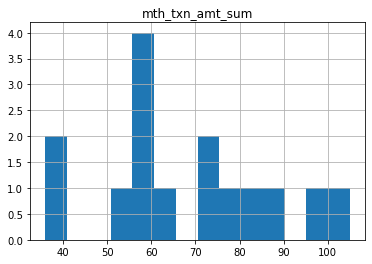

In [28]:
CS1112.hist(column='mth_txn_amt_sum', bins=14)

The most common values are between 52 to 65. The maximum value is 105.

array([[<AxesSubplot:title={'center':'mth_txn_cnt'}>]], dtype=object)

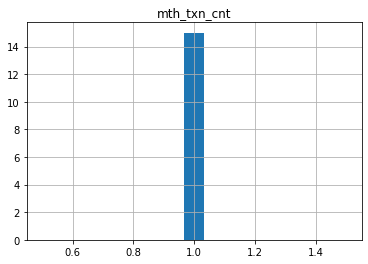

In [29]:
CS1112.hist(column='mth_txn_cnt', bins=15)

From the above histogram, we can observe that the client CS1112 has made 15 purchases. He has made only one purchase every month. That's the reason why count is 1 for all months.

By comparing from section 1.2, We can verify that maximum purchases by client CS1112 was done in 2012. This is because, ann_txn_amt_sum is 337 for 2012 which is the highest compared to other years. This means that the client shopped maximum number of times in 2012. This can be verrified from the above table that 'mth_txn_cnt' is 5 for 2012.

array([[<AxesSubplot:title={'center':'mth_txn_amt_sum'}>]], dtype=object)

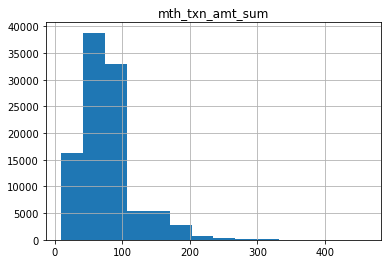

In [30]:
clnt_monthly_aggregations.hist(column='mth_txn_amt_sum', bins=14)

array([[<AxesSubplot:title={'center':'mth_txn_cnt'}>]], dtype=object)

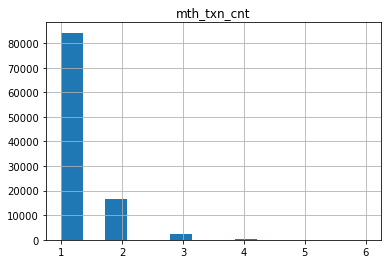

In [31]:
clnt_monthly_aggregations.hist(column='mth_txn_cnt', bins=14)

### 1.4 Create the base table for the rolling window features

**1. Create the numpy array of the unique elements in columns 'customer id' and 'ME DT'
of the txn table you created in section 1.1. Confirm that you have 6,889 unique clients
and 47 unique month-end-dates.**

In [32]:
txn

,customer_id,tran_amount,txn_date,ME_DT,Year
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


In [33]:
clnt_no = np.unique(txn['customer_id'])
clnt_no

array(['CS1112', 'CS1113', 'CS1114', ..., 'CS8998', 'CS8999', 'CS9000'],
      dtype=object)

In [34]:
me_dt = np.unique(txn['ME_DT'])
me_dt

array(['2011-05-31T00:00:00.000000000', '2011-06-30T00:00:00.000000000',
       '2011-07-31T00:00:00.000000000', '2011-08-31T00:00:00.000000000',
       '2011-09-30T00:00:00.000000000', '2011-10-31T00:00:00.000000000',
       '2011-11-30T00:00:00.000000000', '2011-12-31T00:00:00.000000000',
       '2012-01-31T00:00:00.000000000', '2012-02-29T00:00:00.000000000',
       '2012-03-31T00:00:00.000000000', '2012-04-30T00:00:00.000000000',
       '2012-05-31T00:00:00.000000000', '2012-06-30T00:00:00.000000000',
       '2012-07-31T00:00:00.000000000', '2012-08-31T00:00:00.000000000',
       '2012-09-30T00:00:00.000000000', '2012-10-31T00:00:00.000000000',
       '2012-11-30T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-01-31T00:00:00.000000000', '2013-02-28T00:00:00.000000000',
       '2013-03-31T00:00:00.000000000', '2013-04-30T00:00:00.000000000',
       '2013-05-31T00:00:00.000000000', '2013-06-30T00:00:00.000000000',
       '2013-07-31T00:00:00.000000000', '2013-08-31

In [35]:
np.shape(clnt_no)

(6889,)

In [36]:
np.shape(me_dt)

(47,)

It is confirmed that there are 6889 unique clients and 47 unique month-end-dates

**2. Use itertools.product to generate all the possible combinations of 'customer id' and
'ME DT'.**

In [37]:
base_table = product(clnt_no,me_dt)
base_table

In [38]:
type(base_table)

itertools.product

**3. Next, you want to convert the itertools.product object base table into a pandas ob-
ject called base table pd. To do so, use pd.DataFrame.from records and name the
columns 'CLNT NO' and 'ME DT'.**

In [39]:
base_table_pd = pd.DataFrame.from_records(base_table)
base_table_pd

,0,1
0,CS1112,2011-05-31
1,CS1112,2011-06-30
2,CS1112,2011-07-31
3,CS1112,2011-08-31
4,CS1112,2011-09-30
...,...,...
323778,CS9000,2014-11-30
323779,CS9000,2014-12-31
323780,CS9000,2015-01-31
323781,CS9000,2015-02-28


In [40]:
base_table_pd.columns = ['CLNT_NO','ME_DT']

In [41]:
base_table_pd

,CLNT_NO,ME_DT
0,CS1112,2011-05-31
1,CS1112,2011-06-30
2,CS1112,2011-07-31
3,CS1112,2011-08-31
4,CS1112,2011-09-30
...,...,...
323778,CS9000,2014-11-30
323779,CS9000,2014-12-31
323780,CS9000,2015-01-31
323781,CS9000,2015-02-28


**4. Finally, you want to validate that you created the table you originally wanted. There
are two checks you want to perform:
a) Filter client CS1112 and confirm that the dates fall between the min and max
month-dates you identified in section 1.1. Also, confirm that the snapshot of client
CS1112 has 47 rows, one for each month in the dataset.
b) Confirm that the base table pd has 323,783 rows, which is the expected value
of combinations for 6,889 unique clients and 47 unique month-end dates.**

In [42]:
base_table_pd[:47]

,CLNT_NO,ME_DT
0,CS1112,2011-05-31
1,CS1112,2011-06-30
2,CS1112,2011-07-31
3,CS1112,2011-08-31
4,CS1112,2011-09-30
5,CS1112,2011-10-31
6,CS1112,2011-11-30
7,CS1112,2011-12-31
8,CS1112,2012-01-31
9,CS1112,2012-02-29


In [43]:
base_table_pd['ME_DT'].min()

Timestamp('2011-05-31 00:00:00')

In [44]:
base_table_pd['ME_DT'].max()

Timestamp('2015-03-31 00:00:00')

**4. Finally, you want to validate that you created the table you originally wanted. There
are two checks you want to perform:
Answers**

a) The data for client CS1112 was filtered and confirmed that the dates fall between the min and max month-dates identified in section 1.1

b) From the above table, it is also confirmed that there are 47 rows for client CS1112 one for each month in the data set.

### 1.5 Create the monthly rolling window features

**1.Left-join the base table pd with the clnt monthly aggregations table from section
1.3 on [CLNT NO, ME DT] to create the table base clnt mth.
Comment on the
following questions in Markdown:
a) Why do some rows have NaN values?
b) What values will you choose to impute NaN values in the sum and count columns?
Perform the imputation you suggest.
c) Confirm that the number of rows is what you expect. What is the value?
d) How are tables base clnt mth and clnt monthly aggregations different? Com-
ment on the number of rows and the content of each table.**

In [45]:
base_clnt_mth = base_table_pd.join(clnt_monthly_aggregations, on = ['CLNT_NO','ME_DT'], how = 'left')
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2011-05-31,NaN,NaN
1,CS1112,2011-06-30,56.0,1.0
2,CS1112,2011-07-31,NaN,NaN
3,CS1112,2011-08-31,96.0,1.0
4,CS1112,2011-09-30,NaN,NaN
...,...,...,...,...
323778,CS9000,2014-11-30,NaN,NaN
323779,CS9000,2014-12-31,NaN,NaN
323780,CS9000,2015-01-31,NaN,NaN
323781,CS9000,2015-02-28,34.0,1.0


a) Some rows have NaN values because the customer did not purchase any products during those months. Hence the count value of that particular month will also be NaN.

In [46]:
base_clnt_mth = base_clnt_mth.apply(lambda x: x.fillna(0),axis=0)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2011-05-31,0.0,0.0
1,CS1112,2011-06-30,56.0,1.0
2,CS1112,2011-07-31,0.0,0.0
3,CS1112,2011-08-31,96.0,1.0
4,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0
323779,CS9000,2014-12-31,0.0,0.0
323780,CS9000,2015-01-31,0.0,0.0
323781,CS9000,2015-02-28,34.0,1.0


b) If a customer did not purchase any item during a particular month, we replace the 'mth_txn_amt_sum' as 0. similarly the value of 'mth_txn_cnt' at that particular month is also 0.

c) The total number of rows is 323782 which is the expected value.

d) The number of rows in 'base_clnt_mth' is 323783 whereas in 'clnt_monthly_aggregations' the number of rows is 103234. This is because, unique client_ID's are taken using groupby function in 'clnt_monthly_aggregations'. 

The information in 'clnt_monthly_aggregations' dataset is irregular. Some clients may have an entry for a month, while others do not have an entry.
Whereas in 'base_clnt_mth' the value of transacation is assigned 0 if the client did not purchase any product in a month. This converts the table to regular dataset.

**2. For the next step, the calculation of the rolling window features, you need to sort the
data first by 'CLNT NO' and then by 'ME DT' in ascending order. This is necessary
to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.**

In [47]:
base_clnt_mth.sort_values(by=['CLNT_NO','ME_DT'])

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2011-05-31,0.0,0.0
1,CS1112,2011-06-30,56.0,1.0
2,CS1112,2011-07-31,0.0,0.0
3,CS1112,2011-08-31,96.0,1.0
4,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0
323779,CS9000,2014-12-31,0.0,0.0
323780,CS9000,2015-01-31,0.0,0.0
323781,CS9000,2015-02-28,34.0,1.0


In [48]:
index = base_clnt_mth.index
index.name = "Index"
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
Index,,,,
0,CS1112,2011-05-31,0.0,0.0
1,CS1112,2011-06-30,56.0,1.0
2,CS1112,2011-07-31,0.0,0.0
3,CS1112,2011-08-31,96.0,1.0
4,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0
323779,CS9000,2014-12-31,0.0,0.0
323780,CS9000,2015-01-31,0.0,0.0


**3.Here, you have to calculate separately the 3, 6 and 12-month rolling window features
(tables: rolling features 3M, rolling features 6M, rolling features 12M) for
every client that calculates the aggregations 'sum', mean' and 'max' for both columns
'mth txn amt sum' and 'mth txn cnt'. The steps to achieve this with base clnt mth
as the starting dataframe are:
a) groupby the client number
b) select the two columns you want to aggregate
c) use the rolling function with the appropriate windows
d) aggregate with 'sum', mean' and 'max'**

In [49]:
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO']).rolling(3).agg({'mth_txn_amt_sum':['sum','mean','max'],'mth_txn_cnt':['sum','mean','max']})
rolling_features_3M

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO Index                                                             
CS1112  0                  NaN        NaN   NaN         NaN       NaN  NaN
        1                  NaN        NaN   NaN         NaN       NaN  NaN
        2                 56.0  18.666667  56.0         1.0  0.333333  1.0
        3                152.0  50.666667  96.0         2.0  0.666667  1.0
        4                 96.0  32.000000  96.0         1.0  0.333333  1.0
...                        ...        ...   ...         ...       ...  ...
CS9000  323778             0.0   0.000000   0.0         0.0  0.000000  0.0
        323779             0.0   0.000000   0.0         0.0  0.000000  0.0
        323780             0.0   0.000000   0.0         0.0  0.000000  0.0
        323781            34.0  11.333333  34.0         1.0  0.333333  1.0
        323782            34.0  11.333333  34.0         1.0  0.333333  1.0

[323783 rows x 6 columns]

The output of the 3-month rolling window dataframe is shown above

In [50]:
rolling_features_3M.loc['CS1112']

mth_txn_amt_sum                   mth_txn_cnt               
                  sum       mean    max         sum      mean  max
Index                                                             
0                 NaN        NaN    NaN         NaN       NaN  NaN
1                 NaN        NaN    NaN         NaN       NaN  NaN
2                56.0  18.666667   56.0         1.0  0.333333  1.0
3               152.0  50.666667   96.0         2.0  0.666667  1.0
4                96.0  32.000000   96.0         1.0  0.333333  1.0
5               156.0  52.000000   96.0         2.0  0.666667  1.0
6                60.0  20.000000   60.0         1.0  0.333333  1.0
7                60.0  20.000000   60.0         1.0  0.333333  1.0
8                 0.0   0.000000    0.0         0.0  0.000000  0.0
9                 0.0   0.000000    0.0         0.0  0.000000  0.0
10                0.0   0.000000    0.0         0.0  0.000000  0.0
11               56.0  18.666667   56.0         1.0  0.333333  1.0
12               56.0  18.666667   56.0         1.0  0.333333  1.0
13              108.0  36.000000   56.0         2.0  0.666667  1.0
14              133.0  44.333333   81.0         2.0  0.666667  1.0
15              133.0  44.333333   81.0         2.0  0.666667  1.0
16              153.0  51.000000   81.0         2.0  0.666667  1.0
17               72.0  24.000000   72.0         1.0  0.333333  1.0
18               72.0  24.000000   72.0         1.0  0.333333  1.0
19               76.0  25.333333   76.0         1.0  0.333333  1.0
20               76.0  25.333333   76.0         1.0  0.333333  1.0
21               76.0  25.333333   76.0         1.0  0.333333  1.0
22              105.0  35.000000  105.0         1.0  0.333333  1.0
23              105.0  35.000000  105.0         1.0  0.333333  1.0
24              105.0  35.000000  105.0         1.0  0.333333  1.0
25                0.0   0.000000    0.0         0.0  0.000000  0.0
26               36.0  12.000000   36.0         1.0  0.333333  1.0
27               36.0  12.000000   36.0         1.0  0.333333  1.0
28               36.0  12.000000   36.0         1.0  0.333333  1.0
29                0.0   0.000000    0.0         0.0  0.000000  0.0
30               71.0  23.666667   71.0         1.0  0.333333  1.0
31               71.0  23.666667   71.0         1.0  0.333333  1.0
32               71.0  23.666667   71.0         1.0  0.333333  1.0
33                0.0   0.000000    0.0         0.0  0.000000  0.0
34                0.0   0.000000    0.0         0.0  0.000000  0.0
35               63.0  21.000000   63.0         1.0  0.333333  1.0
36               63.0  21.000000   63.0         1.0  0.333333  1.0
37               63.0  21.000000   63.0         1.0  0.333333  1.0
38               90.0  30.000000   90.0         1.0  0.333333  1.0
39               90.0  30.000000   90.0         1.0  0.333333  1.0
40               90.0  30.000000   90.0         1.0  0.333333  1.0
41                0.0   0.000000    0.0         0.0  0.000000  0.0
42                0.0   0.000000    0.0         0.0  0.000000  0.0
43               59.0  19.666667   59.0         1.0  0.333333  1.0
44               98.0  32.666667   59.0         2.0  0.666667  1.0
45               98.0  32.666667   59.0         2.0  0.666667  1.0
46               39.0  13.000000   39.0         1.0  0.333333  1.0

The 3-month rolling window dataframe of client CS1112 is shown above

In [51]:
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO']).rolling(6).agg({'mth_txn_amt_sum':['sum','mean','max'],'mth_txn_cnt':['sum','mean','max']})
rolling_features_6M

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO Index                                                             
CS1112  0                  NaN        NaN   NaN         NaN       NaN  NaN
        1                  NaN        NaN   NaN         NaN       NaN  NaN
        2                  NaN        NaN   NaN         NaN       NaN  NaN
        3                  NaN        NaN   NaN         NaN       NaN  NaN
        4                  NaN        NaN   NaN         NaN       NaN  NaN
...                        ...        ...   ...         ...       ...  ...
CS9000  323778            61.0  10.166667  35.0         2.0  0.333333  1.0
        323779            61.0  10.166667  35.0         2.0  0.333333  1.0
        323780            35.0   5.833333  35.0         1.0  0.166667  1.0
        323781            34.0   5.666667  34.0         1.0  0.166667  1.0
        323782            34.0   5.666667  34.0         1.0  0.166667  1.0

[323783 rows x 6 columns]

The output of the 6-month rolling window dataframe is shown above

In [52]:
rolling_features_6M.loc['CS1112']

mth_txn_amt_sum                   mth_txn_cnt               
                  sum       mean    max         sum      mean  max
Index                                                             
0                 NaN        NaN    NaN         NaN       NaN  NaN
1                 NaN        NaN    NaN         NaN       NaN  NaN
2                 NaN        NaN    NaN         NaN       NaN  NaN
3                 NaN        NaN    NaN         NaN       NaN  NaN
4                 NaN        NaN    NaN         NaN       NaN  NaN
5               212.0  35.333333   96.0         3.0  0.500000  1.0
6               212.0  35.333333   96.0         3.0  0.500000  1.0
7               156.0  26.000000   96.0         2.0  0.333333  1.0
8               156.0  26.000000   96.0         2.0  0.333333  1.0
9                60.0  10.000000   60.0         1.0  0.166667  1.0
10               60.0  10.000000   60.0         1.0  0.166667  1.0
11               56.0   9.333333   56.0         1.0  0.166667  1.0
12               56.0   9.333333   56.0         1.0  0.166667  1.0
13              108.0  18.000000   56.0         2.0  0.333333  1.0
14              189.0  31.500000   81.0         3.0  0.500000  1.0
15              189.0  31.500000   81.0         3.0  0.500000  1.0
16              261.0  43.500000   81.0         4.0  0.666667  1.0
17              205.0  34.166667   81.0         3.0  0.500000  1.0
18              205.0  34.166667   81.0         3.0  0.500000  1.0
19              229.0  38.166667   81.0         3.0  0.500000  1.0
20              148.0  24.666667   76.0         2.0  0.333333  1.0
21              148.0  24.666667   76.0         2.0  0.333333  1.0
22              181.0  30.166667  105.0         2.0  0.333333  1.0
23              181.0  30.166667  105.0         2.0  0.333333  1.0
24              181.0  30.166667  105.0         2.0  0.333333  1.0
25              105.0  17.500000  105.0         1.0  0.166667  1.0
26              141.0  23.500000  105.0         2.0  0.333333  1.0
27              141.0  23.500000  105.0         2.0  0.333333  1.0
28               36.0   6.000000   36.0         1.0  0.166667  1.0
29               36.0   6.000000   36.0         1.0  0.166667  1.0
30              107.0  17.833333   71.0         2.0  0.333333  1.0
31              107.0  17.833333   71.0         2.0  0.333333  1.0
32               71.0  11.833333   71.0         1.0  0.166667  1.0
33               71.0  11.833333   71.0         1.0  0.166667  1.0
34               71.0  11.833333   71.0         1.0  0.166667  1.0
35              134.0  22.333333   71.0         2.0  0.333333  1.0
36               63.0  10.500000   63.0         1.0  0.166667  1.0
37               63.0  10.500000   63.0         1.0  0.166667  1.0
38              153.0  25.500000   90.0         2.0  0.333333  1.0
39              153.0  25.500000   90.0         2.0  0.333333  1.0
40              153.0  25.500000   90.0         2.0  0.333333  1.0
41               90.0  15.000000   90.0         1.0  0.166667  1.0
42               90.0  15.000000   90.0         1.0  0.166667  1.0
43              149.0  24.833333   90.0         2.0  0.333333  1.0
44               98.0  16.333333   59.0         2.0  0.333333  1.0
45               98.0  16.333333   59.0         2.0  0.333333  1.0
46               98.0  16.333333   59.0         2.0  0.333333  1.0

The 6-month rolling window dataframe of client CS1112 is shown above.

In [53]:
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO']).rolling(12).agg({'mth_txn_amt_sum':['sum','mean','max'],'mth_txn_cnt':['sum','mean','max']})
rolling_features_12M

mth_txn_amt_sum                 mth_txn_cnt               
                           sum      mean   max         sum      mean  max
CLNT_NO Index                                                            
CS1112  0                  NaN       NaN   NaN         NaN       NaN  NaN
        1                  NaN       NaN   NaN         NaN       NaN  NaN
        2                  NaN       NaN   NaN         NaN       NaN  NaN
        3                  NaN       NaN   NaN         NaN       NaN  NaN
        4                  NaN       NaN   NaN         NaN       NaN  NaN
...                        ...       ...   ...         ...       ...  ...
CS9000  323778            97.0  8.083333  35.0         4.0  0.333333  1.0
        323779            97.0  8.083333  35.0         4.0  0.333333  1.0
        323780            81.0  6.750000  35.0         3.0  0.250000  1.0
        323781           115.0  9.583333  35.0         4.0  0.333333  1.0
        323782           115.0  9.583333  35.0         4.0  0.333333  1.0

[323783 rows x 6 columns]

The output of the 12-month rolling window dataframe is shown above.

In [54]:
rolling_features_12M.loc['CS1112']

mth_txn_amt_sum                   mth_txn_cnt               
                  sum       mean    max         sum      mean  max
Index                                                             
0                 NaN        NaN    NaN         NaN       NaN  NaN
1                 NaN        NaN    NaN         NaN       NaN  NaN
2                 NaN        NaN    NaN         NaN       NaN  NaN
3                 NaN        NaN    NaN         NaN       NaN  NaN
4                 NaN        NaN    NaN         NaN       NaN  NaN
5                 NaN        NaN    NaN         NaN       NaN  NaN
6                 NaN        NaN    NaN         NaN       NaN  NaN
7                 NaN        NaN    NaN         NaN       NaN  NaN
8                 NaN        NaN    NaN         NaN       NaN  NaN
9                 NaN        NaN    NaN         NaN       NaN  NaN
10                NaN        NaN    NaN         NaN       NaN  NaN
11              268.0  22.333333   96.0         4.0  0.333333  1.0
12              268.0  22.333333   96.0         4.0  0.333333  1.0
13              264.0  22.000000   96.0         4.0  0.333333  1.0
14              345.0  28.750000   96.0         5.0  0.416667  1.0
15              249.0  20.750000   81.0         4.0  0.333333  1.0
16              321.0  26.750000   81.0         5.0  0.416667  1.0
17              261.0  21.750000   81.0         4.0  0.333333  1.0
18              261.0  21.750000   81.0         4.0  0.333333  1.0
19              337.0  28.083333   81.0         5.0  0.416667  1.0
20              337.0  28.083333   81.0         5.0  0.416667  1.0
21              337.0  28.083333   81.0         5.0  0.416667  1.0
22              442.0  36.833333  105.0         6.0  0.500000  1.0
23              386.0  32.166667  105.0         5.0  0.416667  1.0
24              386.0  32.166667  105.0         5.0  0.416667  1.0
25              334.0  27.833333  105.0         4.0  0.333333  1.0
26              289.0  24.083333  105.0         4.0  0.333333  1.0
27              289.0  24.083333  105.0         4.0  0.333333  1.0
28              217.0  18.083333  105.0         3.0  0.250000  1.0
29              217.0  18.083333  105.0         3.0  0.250000  1.0
30              288.0  24.000000  105.0         4.0  0.333333  1.0
31              212.0  17.666667  105.0         3.0  0.250000  1.0
32              212.0  17.666667  105.0         3.0  0.250000  1.0
33              212.0  17.666667  105.0         3.0  0.250000  1.0
34              107.0   8.916667   71.0         2.0  0.166667  1.0
35              170.0  14.166667   71.0         3.0  0.250000  1.0
36              170.0  14.166667   71.0         3.0  0.250000  1.0
37              170.0  14.166667   71.0         3.0  0.250000  1.0
38              224.0  18.666667   90.0         3.0  0.250000  1.0
39              224.0  18.666667   90.0         3.0  0.250000  1.0
40              224.0  18.666667   90.0         3.0  0.250000  1.0
41              224.0  18.666667   90.0         3.0  0.250000  1.0
42              153.0  12.750000   90.0         2.0  0.166667  1.0
43              212.0  17.666667   90.0         3.0  0.250000  1.0
44              251.0  20.916667   90.0         4.0  0.333333  1.0
45              251.0  20.916667   90.0         4.0  0.333333  1.0
46              251.0  20.916667   90.0         4.0  0.333333  1.0

The 12-month rolling window dataframe of client CS1112 is shown above.

**How many rows appear with NaN values at the beginning of each client for 3, 6
and 12-month windows, respectively? Why do they appear?**

a) For 3-month windows, first 2 rows contain NaN values for each client.

b) For 6-month windows, first 5 rows contain NaN values for each client.

c) For 12-month windows, first 11 rows contain NaN values for each client.

d) By default rolling function looks for n-1 prior rows of data to aggregate, where n is the window size. If that condition is not met, it will return NaN for the window.

**How many levels do the index and columns have? Are these MultiIndex dataframes?**

In [55]:
rolling_features_3M.columns.nlevels

2

In [56]:
rolling_features_3M.index.nlevels

2

From the above code we observe that there are 2 levels for index and 2 levels for columns. Therefore these are MultiIndex dataframes 

**Rename the columns as following: 'amt sum 3M', 'amt mean 3M', 'amt max 3M',
'txn cnt sum 3M', 'txn cnt mean 3M', 'txn cnt max 3M' and follow the same nam-
ing convention for 6M and 12M.**

In [57]:
rolling_features_3M.columns = ['amt_sum_3M','amt_mean_3M','amt_max_3M','txn_cnt_sum_3M','txn_cnt_mean_3M','txn_cnt_max_3M']
DataFrame(rolling_features_3M)

amt_sum_3M  amt_mean_3M  amt_max_3M  txn_cnt_sum_3M  \
CLNT_NO Index                                                         
CS1112  0              NaN          NaN         NaN             NaN   
        1              NaN          NaN         NaN             NaN   
        2             56.0    18.666667        56.0             1.0   
        3            152.0    50.666667        96.0             2.0   
        4             96.0    32.000000        96.0             1.0   
...                    ...          ...         ...             ...   
CS9000  323778         0.0     0.000000         0.0             0.0   
        323779         0.0     0.000000         0.0             0.0   
        323780         0.0     0.000000         0.0             0.0   
        323781        34.0    11.333333        34.0             1.0   
        323782        34.0    11.333333        34.0             1.0   

                txn_cnt_mean_3M  txn_cnt_max_3M  
CLNT_NO Index                                    
CS1112  0                   NaN             NaN  
        1                   NaN             NaN  
        2              0.333333             1.0  
        3              0.666667             1.0  
        4              0.333333             1.0  
...                         ...             ...  
CS9000  323778         0.000000             0.0  
        323779         0.000000             0.0  
        323780         0.000000             0.0  
        323781         0.333333             1.0  
        323782         0.333333             1.0  

[323783 rows x 6 columns]

In [58]:
rolling_features_6M.columns = ['amt_sum_6M','amt_mean_6M','amt_max_6M','txn_cnt_sum_6M','txn_cnt_mean_6M','txn_cnt_max_6M']
DataFrame(rolling_features_6M)

amt_sum_6M  amt_mean_6M  amt_max_6M  txn_cnt_sum_6M  \
CLNT_NO Index                                                         
CS1112  0              NaN          NaN         NaN             NaN   
        1              NaN          NaN         NaN             NaN   
        2              NaN          NaN         NaN             NaN   
        3              NaN          NaN         NaN             NaN   
        4              NaN          NaN         NaN             NaN   
...                    ...          ...         ...             ...   
CS9000  323778        61.0    10.166667        35.0             2.0   
        323779        61.0    10.166667        35.0             2.0   
        323780        35.0     5.833333        35.0             1.0   
        323781        34.0     5.666667        34.0             1.0   
        323782        34.0     5.666667        34.0             1.0   

                txn_cnt_mean_6M  txn_cnt_max_6M  
CLNT_NO Index                                    
CS1112  0                   NaN             NaN  
        1                   NaN             NaN  
        2                   NaN             NaN  
        3                   NaN             NaN  
        4                   NaN             NaN  
...                         ...             ...  
CS9000  323778         0.333333             1.0  
        323779         0.333333             1.0  
        323780         0.166667             1.0  
        323781         0.166667             1.0  
        323782         0.166667             1.0  

[323783 rows x 6 columns]

In [59]:
rolling_features_12M.columns = ['amt_sum_12M','amt_mean_12M','amt_max_12M','txn_cnt_sum_12M','txn_cnt_mean_12M','txn_cnt_max_12M']
DataFrame(rolling_features_12M)

amt_sum_12M  amt_mean_12M  amt_max_12M  txn_cnt_sum_12M  \
CLNT_NO Index                                                             
CS1112  0               NaN           NaN          NaN              NaN   
        1               NaN           NaN          NaN              NaN   
        2               NaN           NaN          NaN              NaN   
        3               NaN           NaN          NaN              NaN   
        4               NaN           NaN          NaN              NaN   
...                     ...           ...          ...              ...   
CS9000  323778         97.0      8.083333         35.0              4.0   
        323779         97.0      8.083333         35.0              4.0   
        323780         81.0      6.750000         35.0              3.0   
        323781        115.0      9.583333         35.0              4.0   
        323782        115.0      9.583333         35.0              4.0   

                txn_cnt_mean_12M  txn_cnt_max_12M  
CLNT_NO Index                                      
CS1112  0                    NaN              NaN  
        1                    NaN              NaN  
        2                    NaN              NaN  
        3                    NaN              NaN  
        4                    NaN              NaN  
...                          ...              ...  
CS9000  323778          0.333333              1.0  
        323779          0.333333              1.0  
        323780          0.250000              1.0  
        323781          0.333333              1.0  
        323782          0.333333              1.0  

[323783 rows x 6 columns]

**4. Merge the 4 tables: base clnt mth, rolling features 3M, rolling features 6M,
rolling features 12M in the output all rolling features. It is recommended to
drop the level:0 of the rolling features MultiIndex table and join with base clnt mth
on the indexes.**

In [60]:
merged_df = pd.merge(base_clnt_mth, rolling_features_3M, on=base_clnt_mth.index)
merged_df

,key_0,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M
0,0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0
3,3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0
4,4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
323778,323778,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
323779,323779,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
323780,323780,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
323781,323781,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0


In [61]:
merged_df.drop(columns = ['key_0'], inplace = True)
merged_df

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M
0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0
3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0
4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
323779,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
323780,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
323781,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0


In [62]:
df = pd.merge(merged_df, rolling_features_6M, on=merged_df.index)
df

,key_0,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M
0,0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,323778,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0
323779,323779,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0
323780,323780,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,35.0,5.833333,35.0,1.0,0.166667,1.0
323781,323781,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,34.0,5.666667,34.0,1.0,0.166667,1.0


In [63]:
df.drop(columns = ['key_0'], inplace = True)
df

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M
0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0
323779,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0
323780,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,35.0,5.833333,35.0,1.0,0.166667,1.0
323781,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,34.0,5.666667,34.0,1.0,0.166667,1.0


In [64]:
all_rolling_features = pd.merge(df, rolling_features_12M, on=df.index)
all_rolling_features

,key_0,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,323778,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323779,323779,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323780,323780,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
323781,323781,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


In [65]:
all_rolling_features.drop(columns = ['key_0'], inplace = True)
all_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323779,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323780,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
323781,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


**5. Confirm that your final output all rolling features has 323,783 rows and 22 columns
and save it as mth rolling features.xlsx.**

In [66]:
all_rolling_features.shape

(323783, 22)

From the above code, it is confirmed that 'all_rolling_features' has 323,783 rows and 22 columns

In [67]:
all_rolling_features.to_excel("mth_rolling_features.xlsx")

### 1.6 Date-related features: date of the week

In [68]:
txn

,customer_id,tran_amount,txn_date,ME_DT,Year
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


**1) The DatetimeIndex object you used earlier allows you to extract many components
of a DateTime object. Here, you want to use the attributes dt.dayofweek and/or
dt.day name() to extract the day of the week from column 'txn date' of the txn
table (with Monday=0, Sunday=6).**

In [69]:
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn

,customer_id,tran_amount,txn_date,ME_DT,Year,day_of_the_week
0,CS5295,35,2013-02-11,2013-02-28,2013,0
1,CS4768,39,2015-03-15,2015-03-31,2015,6
2,CS2122,52,2013-02-26,2013-02-28,2013,1
3,CS1217,99,2011-11-16,2011-11-30,2011,2
4,CS1850,78,2013-11-20,2013-11-30,2013,2
...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6
124996,CS7232,38,2014-08-19,2014-08-31,2014,1
124997,CS8731,42,2014-11-28,2014-11-30,2014,4
124998,CS8133,13,2013-12-14,2013-12-31,2013,5


In [70]:
txn['day_name'] = txn['txn_date'].dt.day_name()
txn

,customer_id,tran_amount,txn_date,ME_DT,Year,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


**2. Create the bar plot that shows the count of transactions per day of the week.**

In [71]:
txn['day_of_the_week'].value_counts()

1    18031
2    18028
5    17929
0    17885
3    17796
6    17741
4    17590
Name: day_of_the_week, dtype: int64

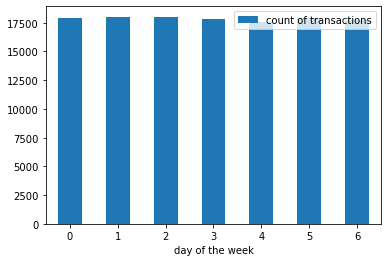

In [72]:
bar_plot = pd.DataFrame({'day of the week':[0,1,2,3,4,5,6], 'count of transactions':[17885,18031,18028,17796,17590,17929,17741]})
ax = bar_plot.plot.bar(x='day of the week', y='count of transactions', rot=1)

**3. Following the same logic as in section 1.2, generate the features that capture the count
of transactions per client, year and day of the week.**

In [73]:
count_of_transactions = txn.groupby(['customer_id','Year','day_name']).agg({'day_of_the_week': ['count']})
count_of_transactions

day_of_the_week
                                     count
customer_id Year day_name                 
CS1112      2011 Friday                  1
                 Sunday                  1
                 Wednesday               1
            2012 Saturday                1
                 Sunday                  3
...                                    ...
CS9000      2013 Tuesday                 1
            2014 Sunday                  2
                 Thursday                1
                 Tuesday                 1
            2015 Saturday                1

[93736 rows x 1 columns]

In [74]:
count_of_transactions.columns = ['cnt']
count_of_transactions

cnt
customer_id Year day_name      
CS1112      2011 Friday       1
                 Sunday       1
                 Wednesday    1
            2012 Saturday     1
                 Sunday       3
...                         ...
CS9000      2013 Tuesday      1
            2014 Sunday       2
                 Thursday     1
                 Tuesday      1
            2015 Saturday     1

[93736 rows x 1 columns]

In [75]:
count_of_transactions_pivot = pd.pivot_table(count_of_transactions,values=['cnt'],index=['customer_id'],columns=['Year','day_name'])
count_of_transactions_pivot

cnt                                                           \
Year          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112         1.0    NaN      NaN    1.0      NaN     NaN       1.0    NaN   
CS1113         1.0    1.0      NaN    1.0      NaN     NaN       NaN    2.0   
CS1114         NaN    1.0      NaN    1.0      1.0     NaN       2.0    NaN   
CS1115         NaN    NaN      1.0    1.0      NaN     NaN       1.0    1.0   
CS1116         1.0    1.0      NaN    NaN      1.0     1.0       NaN    1.0   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996         NaN    1.0      NaN    NaN      NaN     1.0       NaN    NaN   
CS8997         NaN    NaN      NaN    NaN      1.0     NaN       1.0    1.0   
CS8998         NaN    NaN      NaN    NaN      NaN     1.0       1.0    2.0   
CS8999         NaN    1.0      1.0    NaN      NaN     1.0       NaN    1.0   
CS9000         NaN    NaN      NaN    2.0      NaN     NaN       NaN    1.0   

                             ...                                           \
Year                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112         NaN      1.0  ...      1.0     1.0       1.0    NaN    NaN   
CS1113         1.0      NaN  ...      NaN     3.0       NaN    NaN    2.0   
CS1114         NaN      1.0  ...      NaN     1.0       1.0    NaN    NaN   
CS1115         1.0      NaN  ...      2.0     NaN       2.0    NaN    NaN   
CS1116         NaN      NaN  ...      NaN     NaN       NaN    NaN    NaN   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996         NaN      3.0  ...      1.0     1.0       2.0    NaN    NaN   
CS8997         2.0      NaN  ...      NaN     NaN       NaN    NaN    NaN   
CS8998         NaN      NaN  ...      NaN     1.0       1.0    NaN    NaN   
CS8999         NaN      2.0  ...      NaN     NaN       2.0    NaN    NaN   
CS9000         NaN      1.0  ...      1.0     1.0       NaN    NaN    NaN   

                                                        
Year                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112           NaN    NaN      NaN     NaN       1.0  
CS1113           NaN    NaN      NaN     NaN       1.0  
CS1114           NaN    NaN      1.0     NaN       NaN  
CS1115           NaN    NaN      1.0     NaN       NaN  
CS1116           NaN    NaN      NaN     NaN       NaN  
...              ...    ...      ...     ...       ...  
CS8996           NaN    NaN      NaN     NaN       NaN  
CS8997           NaN    NaN      NaN     NaN       NaN  
CS8998           NaN    NaN      NaN     NaN       NaN  
CS8999           NaN    NaN      NaN     NaN       NaN  
CS9000           1.0    NaN      NaN     NaN       NaN  

[6889 rows x 35 columns]

In [76]:
count_of_transactions_pivot = count_of_transactions_pivot.apply(lambda x: x.fillna(0),axis=0)
count_of_transactions_pivot

cnt                                                           \
Year          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112         1.0    0.0      0.0    1.0      0.0     0.0       1.0    0.0   
CS1113         1.0    1.0      0.0    1.0      0.0     0.0       0.0    2.0   
CS1114         0.0    1.0      0.0    1.0      1.0     0.0       2.0    0.0   
CS1115         0.0    0.0      1.0    1.0      0.0     0.0       1.0    1.0   
CS1116         1.0    1.0      0.0    0.0      1.0     1.0       0.0    1.0   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996         0.0    1.0      0.0    0.0      0.0     1.0       0.0    0.0   
CS8997         0.0    0.0      0.0    0.0      1.0     0.0       1.0    1.0   
CS8998         0.0    0.0      0.0    0.0      0.0     1.0       1.0    2.0   
CS8999         0.0    1.0      1.0    0.0      0.0     1.0       0.0    1.0   
CS9000         0.0    0.0      0.0    2.0      0.0     0.0       0.0    1.0   

                             ...                                           \
Year                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112         0.0      1.0  ...      1.0     1.0       1.0    0.0    0.0   
CS1113         1.0      0.0  ...      0.0     3.0       0.0    0.0    2.0   
CS1114         0.0      1.0  ...      0.0     1.0       1.0    0.0    0.0   
CS1115         1.0      0.0  ...      2.0     0.0       2.0    0.0    0.0   
CS1116         0.0      0.0  ...      0.0     0.0       0.0    0.0    0.0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996         0.0      3.0  ...      1.0     1.0       2.0    0.0    0.0   
CS8997         2.0      0.0  ...      0.0     0.0       0.0    0.0    0.0   
CS8998         0.0      0.0  ...      0.0     1.0       1.0    0.0    0.0   
CS8999         0.0      2.0  ...      0.0     0.0       2.0    0.0    0.0   
CS9000         0.0      1.0  ...      1.0     1.0       0.0    0.0    0.0   

                                                        
Year                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112           0.0    0.0      0.0     0.0       1.0  
CS1113           0.0    0.0      0.0     0.0       1.0  
CS1114           0.0    0.0      1.0     0.0       0.0  
CS1115           0.0    0.0      1.0     0.0       0.0  
CS1116           0.0    0.0      0.0     0.0       0.0  
...              ...    ...      ...     ...       ...  
CS8996           0.0    0.0      0.0     0.0       0.0  
CS8997           0.0    0.0      0.0     0.0       0.0  
CS8998           0.0    0.0      0.0     0.0       0.0  
CS8999           0.0    0.0      0.0     0.0       0.0  
CS9000           1.0    0.0      0.0     0.0       0.0  

[6889 rows x 35 columns]

In [77]:
count_of_transactions_pivot.columns.nlevels

3

It is confirmed that the above MultiIndex dataframe has 3 levels

In [78]:
level_0 = count_of_transactions_pivot.columns.get_level_values(0).astype(str)
level_1 = count_of_transactions_pivot.columns.get_level_values(1).astype(str)
level_2 = count_of_transactions_pivot.columns.get_level_values(2).astype(str)
count_of_transactions_pivot.columns = level_0 + '_' + level_1 + '_' + level_2

In [79]:
count_of_transactions_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CS1113,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
CS1114,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1115,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1116,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8997,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8998,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4. Confirm that your output has the same number of rows as the final output in section 1.2
and save it as annual day of week counts pivot.xlsx. How many features/columns
did you create in this section?**

It is verfied that the dataframe "count_of_transactions_pivot" has the same number of rows as the final output in **section 1.2** which is 6889 rows.

There are totally 35 columns in "count_of_transactions_pivot" dataframe.

In [80]:
count_of_transactions_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")

**5. Similarly, generate the features that capture the count of transactions per client,
month-end-date and day of the week. In contrast with the annual pivot table in
the previous step, here you want to create the pivot with ['customer id', 'ME DT'] as
index to obtain the following output dataframe.**

In [81]:
count_of_transactions_per_client = txn.groupby(['customer_id','ME_DT','day_name']).agg({'day_of_the_week': ['count']})
count_of_transactions_per_client

day_of_the_week
                                           count
customer_id ME_DT      day_name                 
CS1112      2011-06-30 Wednesday               1
            2011-08-31 Friday                  1
            2011-10-31 Sunday                  1
            2012-04-30 Sunday                  1
            2012-06-30 Sunday                  1
...                                          ...
CS9000      2014-01-31 Sunday                  1
            2014-05-31 Thursday                1
            2014-07-31 Tuesday                 1
            2014-08-31 Sunday                  1
            2015-02-28 Saturday                1

[121512 rows x 1 columns]

In [82]:
count_of_transactions_per_client.columns = ['cnt']
count_of_transactions_per_client

cnt
customer_id ME_DT      day_name      
CS1112      2011-06-30 Wednesday    1
            2011-08-31 Friday       1
            2011-10-31 Sunday       1
            2012-04-30 Sunday       1
            2012-06-30 Sunday       1
...                               ...
CS9000      2014-01-31 Sunday       1
            2014-05-31 Thursday     1
            2014-07-31 Tuesday      1
            2014-08-31 Sunday       1
            2015-02-28 Saturday     1

[121512 rows x 1 columns]

In [83]:
count_of_transactions_per_client_pivot = pd.pivot_table(count_of_transactions_per_client,values=['cnt'],index=['customer_id','ME_DT'],columns=['day_name'])
count_of_transactions_per_client_pivot

cnt                                          \
day_name               Friday Monday Saturday Sunday Thursday Tuesday   
customer_id ME_DT                                                       
CS1112      2011-06-30    NaN    NaN      NaN    NaN      NaN     NaN   
            2011-08-31    1.0    NaN      NaN    NaN      NaN     NaN   
            2011-10-31    NaN    NaN      NaN    1.0      NaN     NaN   
            2012-04-30    NaN    NaN      NaN    1.0      NaN     NaN   
            2012-06-30    NaN    NaN      NaN    1.0      NaN     NaN   
...                       ...    ...      ...    ...      ...     ...   
CS9000      2014-01-31    NaN    NaN      NaN    1.0      NaN     NaN   
            2014-05-31    NaN    NaN      NaN    NaN      1.0     NaN   
            2014-07-31    NaN    NaN      NaN    NaN      NaN     1.0   
            2014-08-31    NaN    NaN      NaN    1.0      NaN     NaN   
            2015-02-28    NaN    NaN      1.0    NaN      NaN     NaN   

                                  
day_name               Wednesday  
customer_id ME_DT                 
CS1112      2011-06-30       1.0  
            2011-08-31       NaN  
            2011-10-31       NaN  
            2012-04-30       NaN  
            2012-06-30       NaN  
...                          ...  
CS9000      2014-01-31       NaN  
            2014-05-31       NaN  
            2014-07-31       NaN  
            2014-08-31       NaN  
            2015-02-28       NaN  

[103234 rows x 7 columns]

In [84]:
count_of_transactions_per_client_pivot = count_of_transactions_per_client_pivot.apply(lambda x: x.fillna(0),axis=0)
count_of_transactions_per_client_pivot

cnt                                          \
day_name               Friday Monday Saturday Sunday Thursday Tuesday   
customer_id ME_DT                                                       
CS1112      2011-06-30    0.0    0.0      0.0    0.0      0.0     0.0   
            2011-08-31    1.0    0.0      0.0    0.0      0.0     0.0   
            2011-10-31    0.0    0.0      0.0    1.0      0.0     0.0   
            2012-04-30    0.0    0.0      0.0    1.0      0.0     0.0   
            2012-06-30    0.0    0.0      0.0    1.0      0.0     0.0   
...                       ...    ...      ...    ...      ...     ...   
CS9000      2014-01-31    0.0    0.0      0.0    1.0      0.0     0.0   
            2014-05-31    0.0    0.0      0.0    0.0      1.0     0.0   
            2014-07-31    0.0    0.0      0.0    0.0      0.0     1.0   
            2014-08-31    0.0    0.0      0.0    1.0      0.0     0.0   
            2015-02-28    0.0    0.0      1.0    0.0      0.0     0.0   

                                  
day_name               Wednesday  
customer_id ME_DT                 
CS1112      2011-06-30       1.0  
            2011-08-31       0.0  
            2011-10-31       0.0  
            2012-04-30       0.0  
            2012-06-30       0.0  
...                          ...  
CS9000      2014-01-31       0.0  
            2014-05-31       0.0  
            2014-07-31       0.0  
            2014-08-31       0.0  
            2015-02-28       0.0  

[103234 rows x 7 columns]

In [85]:
level_0 = count_of_transactions_per_client_pivot.columns.get_level_values(0).astype(str)
level_1 = count_of_transactions_per_client_pivot.columns.get_level_values(1).astype(str)
count_of_transactions_per_client_pivot.columns = level_0 + '_' + level_1

In [86]:
count_of_transactions_per_client_pivot

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30         0.0         0.0           0.0         0.0   
            2011-08-31         1.0         0.0           0.0         0.0   
            2011-10-31         0.0         0.0           0.0         1.0   
            2012-04-30         0.0         0.0           0.0         1.0   
            2012-06-30         0.0         0.0           0.0         1.0   
...                            ...         ...           ...         ...   
CS9000      2014-01-31         0.0         0.0           0.0         1.0   
            2014-05-31         0.0         0.0           0.0         0.0   
            2014-07-31         0.0         0.0           0.0         0.0   
            2014-08-31         0.0         0.0           0.0         1.0   
            2015-02-28         0.0         0.0           1.0         0.0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30           0.0          0.0            1.0  
            2011-08-31           0.0          0.0            0.0  
            2011-10-31           0.0          0.0            0.0  
            2012-04-30           0.0          0.0            0.0  
            2012-06-30           0.0          0.0            0.0  
...                              ...          ...            ...  
CS9000      2014-01-31           0.0          0.0            0.0  
            2014-05-31           1.0          0.0            0.0  
            2014-07-31           0.0          1.0            0.0  
            2014-08-31           0.0          0.0            0.0  
            2015-02-28           0.0          0.0            0.0  

[103234 rows x 7 columns]

**6. Join with base table pd as you did in section 1.5 and impute with your choice of
value for NaN. Save the final output as mth day counts.xlxs.**

In [87]:
mth_day_counts = base_table_pd.join(count_of_transactions_per_client_pivot, on = ['CLNT_NO','ME_DT'], how = 'left')
mth_day_counts

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
Index,,,,,,,,,
0,CS1112,2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CS1112,2011-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS1112,2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323779,CS9000,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323780,CS9000,2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
mth_day_counts = mth_day_counts.apply(lambda x: x.fillna(0),axis=0)
mth_day_counts

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
Index,,,,,,,,,
0,CS1112,2011-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CS1112,2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS1112,2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323779,CS9000,2014-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323780,CS9000,2015-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
mth_day_counts.to_excel("mth_day_counts.xlsx")

### 1.7 Date-related features: days since last transaction

**1. The starting point is again the txn table. Recall that most clients have a single
purchase per month, but some clients have multiple purchases in a month. Since
you want to calculate the "days since last transaction", you want to capture the last
transaction in a month for every client.
Use the appropriate groupby to create the table last monthly purchase that cap-
tures the last 'txn date' (aggfunc=max) for every client and month.**

In [90]:
txn

,customer_id,tran_amount,txn_date,ME_DT,Year,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


In [91]:
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg({'txn_date': np.max})
last_monthly_purchase

txn_date
customer_id ME_DT                
CS1112      2011-06-30 2011-06-15
            2011-08-31 2011-08-19
            2011-10-31 2011-10-02
            2012-04-30 2012-04-08
            2012-06-30 2012-06-24
...                           ...
CS9000      2014-01-31 2014-01-12
            2014-05-31 2014-05-08
            2014-07-31 2014-07-08
            2014-08-31 2014-08-24
            2015-02-28 2015-02-28

[103234 rows x 1 columns]

In [92]:
last_monthly_purchase.columns = ['last_monthly_purchase']
last_monthly_purchase

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24
...                                      ...
CS9000      2014-01-31            2014-01-12
            2014-05-31            2014-05-08
            2014-07-31            2014-07-08
            2014-08-31            2014-08-24
            2015-02-28            2015-02-28

[103234 rows x 1 columns]

**2. Join base table pd with last monthly purchase as you did in section 1.5. The
snapshot below shows the output of the created object last monthly purchase base
for client CS1112 who made her/his first purchase on June 2011, then no purchase on
July and made a purchase again on August 2011. What values will you use to impute
the NaT values here? NaT stands for "Not a Timestamp".**

In [93]:
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, on = ['CLNT_NO','ME_DT'], how = 'left')
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase
Index,,,
0,CS1112,2011-05-31,NaT
1,CS1112,2011-06-30,2011-06-15
2,CS1112,2011-07-31,NaT
3,CS1112,2011-08-31,2011-08-19
4,CS1112,2011-09-30,NaT
...,...,...,...
323778,CS9000,2014-11-30,NaT
323779,CS9000,2014-12-31,NaT
323780,CS9000,2015-01-31,NaT


In [94]:
last_monthly_purchase_base[last_monthly_purchase_base.CLNT_NO=='CS1112']

,CLNT_NO,ME_DT,last_monthly_purchase
Index,,,
0,CS1112,2011-05-31,NaT
1,CS1112,2011-06-30,2011-06-15
2,CS1112,2011-07-31,NaT
3,CS1112,2011-08-31,2011-08-19
4,CS1112,2011-09-30,NaT
5,CS1112,2011-10-31,2011-10-02
6,CS1112,2011-11-30,NaT
7,CS1112,2011-12-31,NaT
8,CS1112,2012-01-31,NaT


**3. To answer the imputation problem, we have to think what value should we use for say
July 2011 for 'last monthly purchase'? The answer is that in July the value for the
last monthly purchase is the previous line value: 2011-06-15. In other words, for every
client we want to forward-fill the NaT values.
While pandas fillna() method has a method to forward-fill, here we want to use the
apply and a lambda function with the forward-fill function fill(), with the follow-
ing expression: .apply(lambda x: x.ffill()) applied on object last monthly -
purchase base grouped by CLNT NO.**

In [104]:
forward_fill = last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill(0))
forward_fill

,CLNT_NO,ME_DT,last_monthly_purchase
Index,,,
0,CS1112,2011-05-31,NaT
1,CS1112,2011-06-30,2011-06-15
2,CS1112,2011-07-31,2011-06-15
3,CS1112,2011-08-31,2011-08-19
4,CS1112,2011-09-30,2011-08-19
...,...,...,...
323778,CS9000,2014-11-30,2014-08-24
323779,CS9000,2014-12-31,2014-08-24
323780,CS9000,2015-01-31,2014-08-24


In [105]:
forward_fill[92:98]

,CLNT_NO,ME_DT,last_monthly_purchase
Index,,,
92,CS1113,2015-02-28,2015-02-09
93,CS1113,2015-03-31,2015-02-09
94,CS1114,2011-05-31,NaT
95,CS1114,2011-06-30,NaT
96,CS1114,2011-07-31,2011-07-14
97,CS1114,2011-08-31,2011-08-24


The forward-fill on the grouped by CLNT NO object is expected to leave NaT values
for the first months of every client until they purchase something. The above snapshot
confirms that for client CS1114.

**4. Subtract the two date columns and convert the output to .dt.days to calculate the
column 'days since last txn' as shown in the following snapshot.**

In [106]:
forward_fill['days_since_last_txn'] = (forward_fill['ME_DT'] - forward_fill['last_monthly_purchase']).dt.days
forward_fill

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
Index,,,,
0,CS1112,2011-05-31,NaT,NaN
1,CS1112,2011-06-30,2011-06-15,15.0
2,CS1112,2011-07-31,2011-06-15,46.0
3,CS1112,2011-08-31,2011-08-19,12.0
4,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
323778,CS9000,2014-11-30,2014-08-24,98.0
323779,CS9000,2014-12-31,2014-08-24,129.0
323780,CS9000,2015-01-31,2014-08-24,160.0


array([[<AxesSubplot:title={'center':'days_since_last_txn'}>]],
      dtype=object)

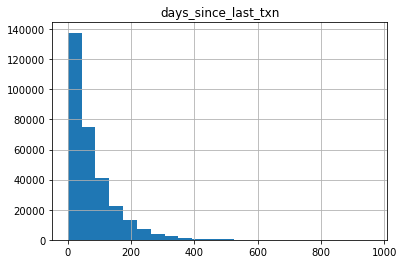

In [107]:
forward_fill.hist(column='days_since_last_txn', bins=22)

In [108]:
forward_fill.drop(columns='last_monthly_purchase',axis=1,inplace=True)

In [109]:
forward_fill

,CLNT_NO,ME_DT,days_since_last_txn
Index,,,
0,CS1112,2011-05-31,NaN
1,CS1112,2011-06-30,15.0
2,CS1112,2011-07-31,46.0
3,CS1112,2011-08-31,12.0
4,CS1112,2011-09-30,42.0
...,...,...,...
323778,CS9000,2014-11-30,98.0
323779,CS9000,2014-12-31,129.0
323780,CS9000,2015-01-31,160.0


In [110]:
forward_fill['days_since_last_txn'].fillna(int(forward_fill['days_since_last_txn'].median()), inplace=True)
forward_fill

,CLNT_NO,ME_DT,days_since_last_txn
Index,,,
0,CS1112,2011-05-31,51.0
1,CS1112,2011-06-30,15.0
2,CS1112,2011-07-31,46.0
3,CS1112,2011-08-31,12.0
4,CS1112,2011-09-30,42.0
...,...,...,...
323778,CS9000,2014-11-30,98.0
323779,CS9000,2014-12-31,129.0
323780,CS9000,2015-01-31,160.0


In [111]:
forward_fill.to_excel("days_since_last_txn.xlsx")